In [317]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [240]:
# setting display options and plot style

pd.set_option("display.max_columns", None)
sns.set_style("whitegrid")


In [241]:
# loading the dataset

df = pd.read_csv("german_credit_data.csv")


In [242]:
# displaying the first few rows of the dataset

df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [243]:
# basic information about the dataset

df["Age"].describe()


count    1000.000000
mean       35.546000
std        11.375469
min        19.000000
25%        27.000000
50%        33.000000
75%        42.000000
max        75.000000
Name: Age, dtype: float64

In [244]:
# distribution of the target variable

df["Risk"].value_counts()


Risk
good    700
bad     300
Name: count, dtype: int64

In [245]:
# checking for missing values

df.shape


(1000, 11)

In [246]:
# summary statistics for all features

df.describe(include="all").T


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,1000.0,NaN,NaN,NaN,499.5,288.819436,0.0,249.75,499.5,749.25,999.0
Age,1000.0,NaN,NaN,NaN,35.546,11.375469,19.0,27.0,33.0,42.0,75.0
Sex,1000,2,male,690,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Job,1000.0,NaN,NaN,NaN,1.904,0.653614,0.0,2.0,2.0,2.0,3.0
Housing,1000,3,own,713,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Saving accounts,817,4,little,603,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Checking account,606,3,little,274,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Credit amount,1000.0,NaN,NaN,NaN,3271.258,2822.736876,250.0,1365.5,2319.5,3972.25,18424.0
Duration,1000.0,NaN,NaN,NaN,20.903,12.058814,4.0,12.0,18.0,24.0,72.0
Purpose,1000,8,car,337,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [247]:
# unique values in the 'Job' column

df["Job"].unique()


array([2, 1, 3, 0])

In [248]:
# checking for duplicate rows

df.duplicated().sum()


np.int64(0)

In [249]:
# dropping rows with missing values and resetting the index

df = df.dropna().reset_index(drop=True)


In [250]:
# checking the columns in the cleaned dataset

df.columns


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [251]:
# dropping the 'Unnamed: 0' column if it exists

df.drop(columns=["Unnamed: 0"], inplace=True)


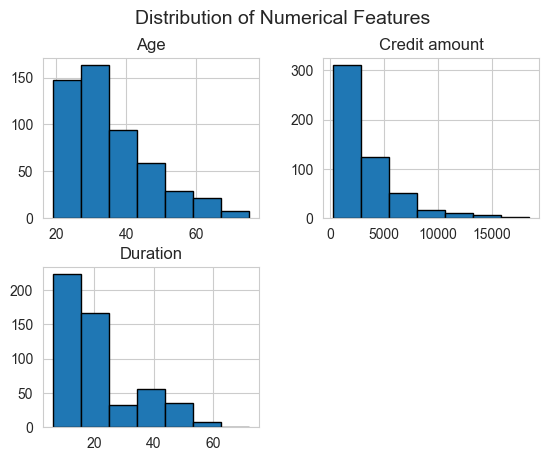

In [252]:
# distribution of numerical features

df[["Age", "Credit amount", "Duration"]].hist(bins=7, edgecolor="black")
plt.suptitle("Distribution of Numerical Features", fontsize=14)
plt.show()


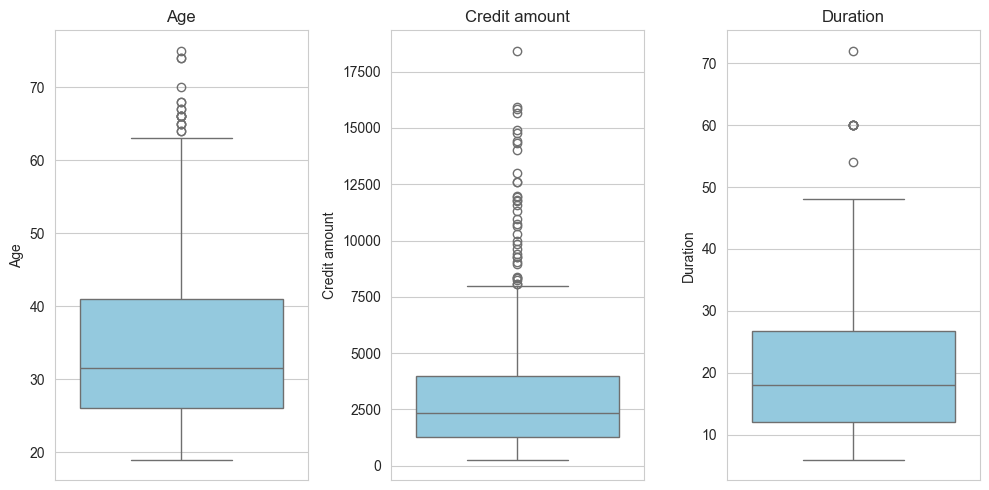

In [253]:
# box plots for numerical features to check for outliers

plt.figure(figsize=(10, 5))
for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(col)

plt.tight_layout()
plt.show()

In [254]:
# defining categorical columns

df.query("Duration >=60")



,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
18,63,male,2,own,little,little,6836,60,business,bad
176,24,female,3,own,moderate,moderate,7408,60,car,bad
199,60,female,3,free,moderate,moderate,14782,60,vacation/others,bad
358,24,male,2,own,moderate,moderate,5595,72,radio/TV,bad
378,27,male,3,own,little,moderate,14027,60,car,bad
489,42,male,2,free,little,moderate,6288,60,education,bad
507,36,male,2,rent,little,little,7297,60,business,bad


In [255]:
# defining categorical columns

categorical_cols = ["Sex", "Job", "Housing", "Saving accounts", "Checking account", "Purpose"]


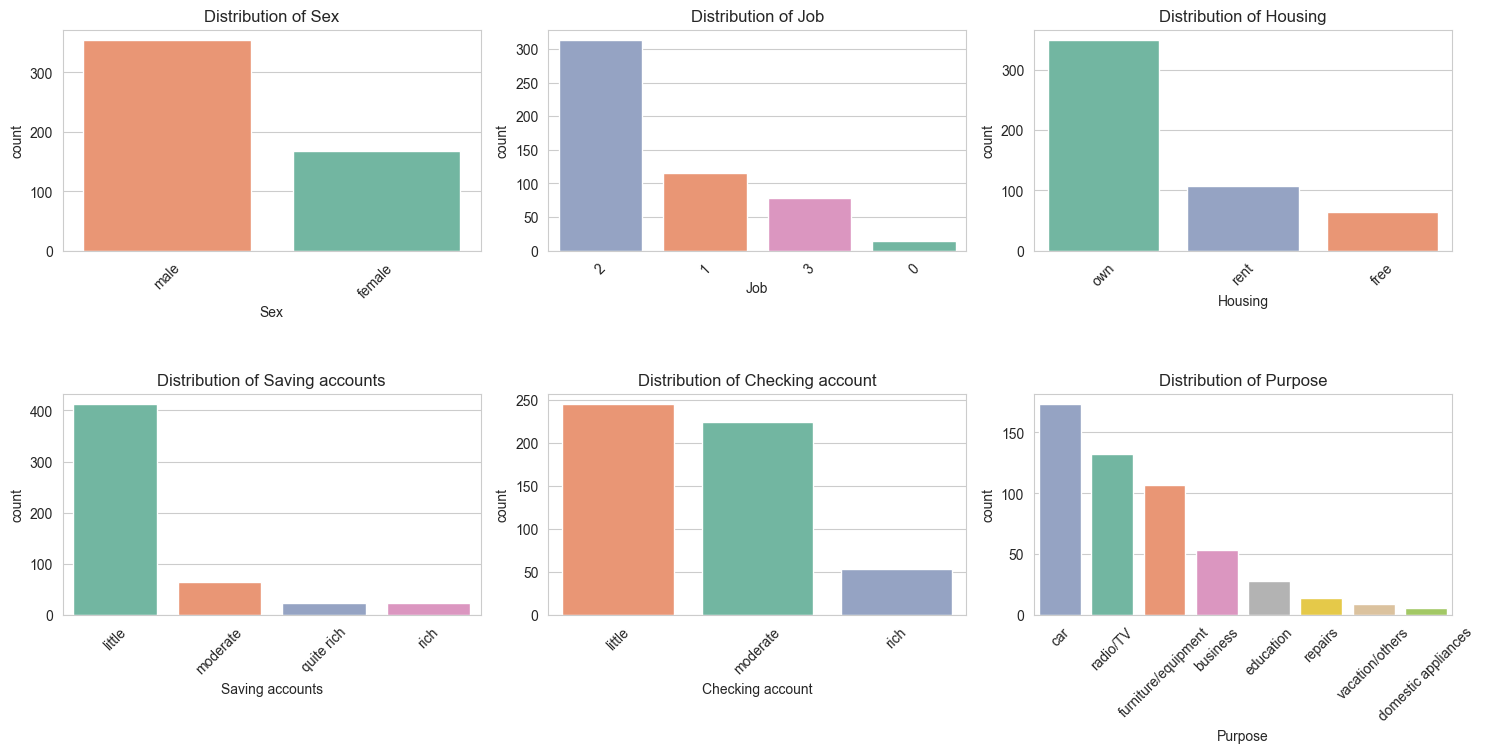

In [256]:
# count plots for categorical features

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(
        data=df,
        x=col,
        hue=col,
        palette="Set2",
        order=df[col].value_counts().index,
        legend=False
    )
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [257]:
# computing correlation matrix for numerical features

corr = df[["Age", "Job", "Credit amount", "Duration"]].corr()



In [258]:
# displaying the

corr

,Age,Job,Credit amount,Duration
Age,1.000000,0.039771,0.082014,0.001549
Job,0.039771,1.000000,0.334721,0.200794
Credit amount,0.082014,0.334721,1.000000,0.613298
Duration,0.001549,0.200794,0.613298,1.000000


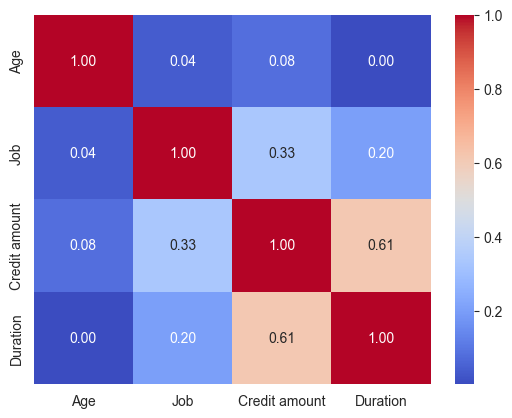

In [259]:
# heatmap of the correlation matrix

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()


In [260]:
# average credit amount by job type

df.groupby("Job")["Credit amount"].mean()


Job
0    1767.857143
1    2250.715517
2    3129.130990
3    5648.784810
Name: Credit amount, dtype: float64

In [261]:
# average credit amount by job type

df.groupby("Sex")["Credit amount"].mean()


Sex
female    2937.202381
male      3440.833333
Name: Credit amount, dtype: float64

In [262]:
# pivot table of average credit amount by housing and purpose

pd.pivot_table(df, values="Credit amount", index="Housing", columns="Purpose")


Purpose,business,car,domestic appliances,education,furniture/equipment,radio/TV,repairs,vacation/others
Housing,,,,,,,,
free,4705.000000,5180.314286,NaN,5314.250000,4419.444444,2097.000000,1190.0,7842.666667
own,3725.973684,3120.485437,1333.5,2625.076923,3031.100000,2307.613861,2993.5,10321.833333
rent,6180.833333,3398.285714,NaN,2627.857143,2890.285714,2138.000000,2384.0,NaN


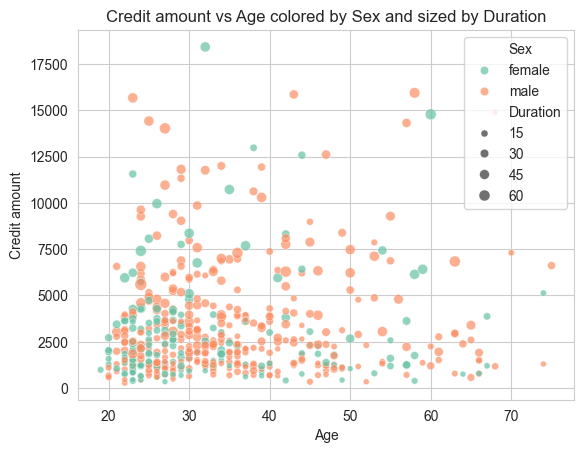

In [263]:
# scatter plot of Credit amount vs Age

sns.scatterplot(
    data=df,
    x="Age",
    y="Credit amount",
    hue="Sex",
    size="Duration",
    alpha=0.7,
    palette="Set2"
)
plt.title("Credit amount vs Age colored by Sex and sized by Duration")
plt.show()


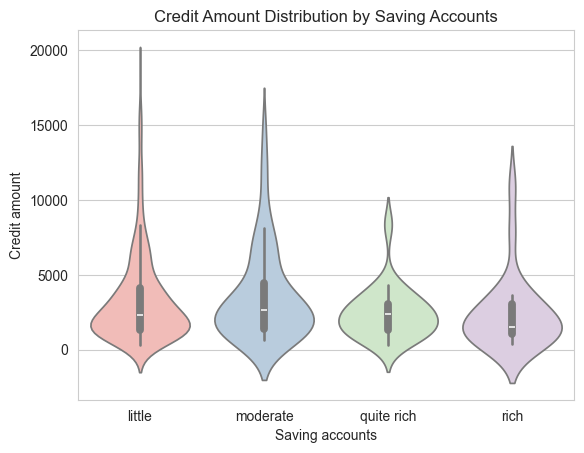

In [264]:
# violin plot of Credit amount by Saving accounts

sns.violinplot(
    data=df,
    x="Saving accounts",
    y="Credit amount",
    hue="Saving accounts",
    palette="Pastel1",
    legend=False
)
plt.title("Credit Amount Distribution by Saving Accounts")
plt.show()



In [265]:
# percentage distribution of the target variable

df["Risk"].value_counts(normalize=True) * 100


Risk
good    55.747126
bad     44.252874
Name: proportion, dtype: float64

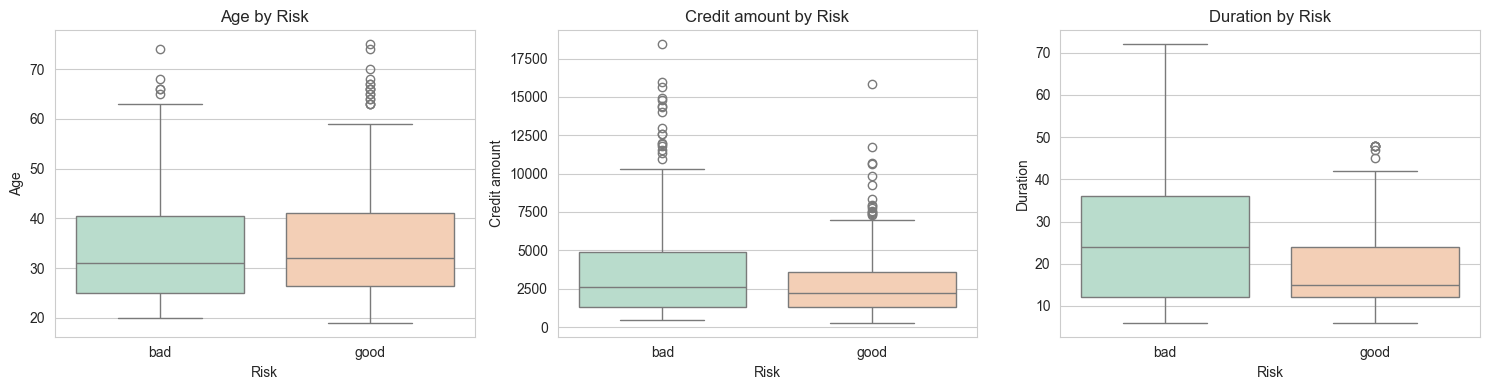

In [266]:
# box plots of numerical features by Risk

plt.figure(figsize=(15, 4))

for i, col in enumerate(["Age", "Credit amount", "Duration"]):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(
        data=df,
        x="Risk",
        y=col,
        hue="Risk",
        palette="Pastel2",
        legend=False
    )
    plt.title(f"{col} by Risk")

plt.tight_layout()
plt.show()


In [267]:
# average values of numerical features by Risk

df.groupby("Risk")[["Age", "Credit amount", "Duration"]].mean()


,Age,Credit amount,Duration
Risk,,,
bad,34.147186,3881.090909,25.445887
good,35.477663,2800.594502,18.079038


In [268]:
# defining categorical columns

categorical_cols


['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

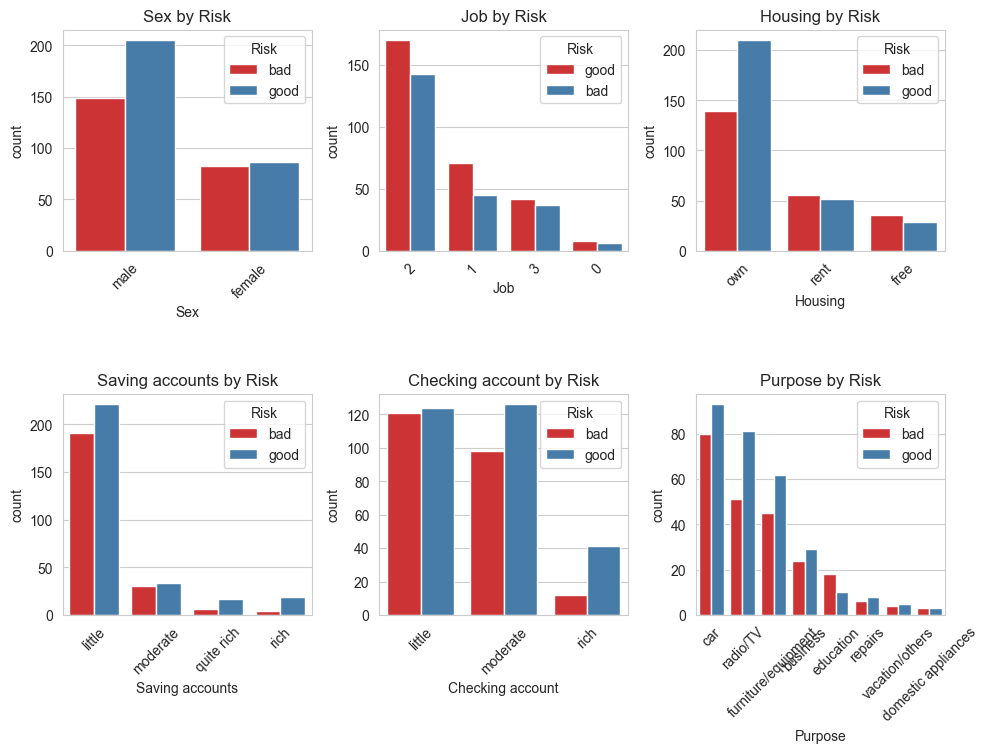

In [269]:
# count plots of categorical features by Risk

plt.figure(figsize=(10, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(
        data=df,
        x=col,
        hue="Risk",
        palette="Set1",
        order=df[col].value_counts().index
    )
    plt.title(f"{col} by Risk")
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [270]:
  # computing the correlation matrix for numerical features
  
  df.columns


Index(['Age', 'Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account',
       'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [271]:
# --- IGNORE ---

features = [
    "Age", "Sex", "Job", "Housing",
    "Saving accounts", "Checking account",
    "Credit amount", "Duration"
]


In [272]:
# defining the target variable

target = "Risk"


In [273]:
# creating a new DataFrame with only the selected features and target variable

df_model = df[features + [target]].copy()


In [274]:
# displaying the first few rows of the new DataFrame

df_model.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,female,2,own,little,moderate,5951,48,bad
1,45,male,2,free,little,little,7882,42,good
2,53,male,2,free,little,little,4870,24,bad
3,35,male,3,rent,little,moderate,6948,36,good
4,28,male,3,own,little,moderate,5234,30,bad


In [275]:
# encoding categorical variables using LabelEncoder

from sklearn.preprocessing import LabelEncoder
import joblib


In [319]:
from sklearn.preprocessing import LabelEncoder
import joblib

job_enc = LabelEncoder()
job_enc.fit(df["Job"])   # or your job column

joblib.dump(job_enc, "Job_encoder.pkl")


['Job_encoder.pkl']

In [276]:
# defining categorical columns for encoding

cat_cols = df_model.select_dtypes(include="object").columns.drop(target)


In [277]:
# creating a dictionary to store LabelEncoders for each categorical column

le_dict = {}


In [278]:
#  categorical columns to encode

cat_cols


Index(['Sex', 'Housing', 'Saving accounts', 'Checking account'], dtype='object')

In [279]:
# encoding each categorical column and saving the LabelEncoders

for col in cat_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    le_dict[col] = le
    joblib.dump(le, f"{col}_encoder.pkl")


In [280]:
# target variable encoding

le_target = LabelEncoder()


In [281]:
# modeling the target variable and saving the LabelEncoder

df_model[target] = le_target.fit_transform(df_model[target])


In [282]:
# saving the target variable encoder

df_model[target].value_counts()


Risk
1    291
0    231
Name: count, dtype: int64

In [283]:
# 

joblib.dump(le_target, "target_encoder.pkl")


['target_encoder.pkl']

In [284]:
# displaying the first few rows of the new DataFrame

df_model.head()


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Risk
0,22,0,2,1,0,1,5951,48,0
1,45,1,2,0,0,0,7882,42,1
2,53,1,2,0,0,0,4870,24,0
3,35,1,3,2,0,1,6948,36,1
4,28,1,3,1,0,1,5234,30,0


In [285]:
# splitting the data into features and target variable

from sklearn.model_selection import train_test_split


In [286]:
# defining the features (X) and target variable (y)

X = df_model.drop(target, axis=1)


In [287]:
# modeling the target variable

y = df_model[target]


In [288]:
# defining the Decision Tree model

X


,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration
0,22,0,2,1,0,1,5951,48
1,45,1,2,0,0,0,7882,42
2,53,1,2,0,0,0,4870,24
3,35,1,3,2,0,1,6948,36
4,28,1,3,1,0,1,5234,30
...,...,...,...,...,...,...,...,...
517,48,1,1,1,0,1,1743,24
518,30,1,3,1,0,0,3959,36
519,40,1,3,1,0,0,3857,30
520,23,1,2,0,0,0,1845,45


In [289]:
# target variable

target


'Risk'

In [290]:
# training and testing split with stratification to maintain class distribution

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=1
)


In [291]:
# shape of the training set

X_train.shape


(417, 8)

In [292]:
# shape of the test set

X_test.shape


(105, 8)

In [293]:
# importing machine learning models and evaluation metrics

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


In [294]:
# function to train a model using GridSearchCV and evaluate its accuracy

def train_model(model, param_grid, X_train, y_train, X_test, y_test):
    grid = GridSearchCV(
        model,
        param_grid,
        cv=5,
        scoring="accuracy",
        n_jobs=-1
    )
    grid.fit(X_train, y_train)
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return best_model, acc, grid.best_params_


In [295]:
# defining the Decision Tree model

dt = DecisionTreeClassifier(random_state=1, class_weight="balanced")


In [296]:
# parameter grid for Decision Tree

dt_param_grid = {
    "max_depth": [3, 5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [297]:
# training the Decision Tree model and evaluating its accuracy

xgb = XGBClassifier(
    random_state=1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="logloss"
)

xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred)
acc_xgb



0.6571428571428571

In [298]:
# printing the best hyperparameters for the Decision Tree model

print("Decision Tree Accuracy:", acc_dt)


Decision Tree Accuracy: 0.580952380952381


In [299]:
# printing the best hyperparameters for the Decision Tree model

print("Best parameters:", params_dt)


Best parameters: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [300]:
# defining the Random Forest model

rf = RandomForestClassifier(
    random_state=1,
    class_weight="balanced",
    n_jobs=-1
)


In [301]:
# grid of hyperparameters for Random Forest

rf_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [302]:
# training the Random Forest model and evaluating its accuracy

best_rf, acc_rf, params_rf = train_model(
    rf, rf_param_grid, X_train, y_train, X_test, y_test
)


In [303]:
# printing the best hyperparameters for the Random Forest model

print("Random Forest Accuracy:", acc_rf)


Random Forest Accuracy: 0.6190476190476191


In [304]:
# printing the best hyperparameters for the Random Forest model

print("Best params:", params_rf)


Best params: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}


In [305]:
# defining the Extra Trees model

et = ExtraTreesClassifier(
    random_state=1,
    class_weight="balanced",
    n_jobs=-1
)


In [306]:
# grid of hyperparameters for Extra Trees

et_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [5, 7, 10, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}


In [307]:
# training the Extra Trees model and evaluating its accuracy

best_et, acc_et, params_et = train_model(
    et, et_param_grid, X_train, y_train, X_test, y_test
)


In [308]:
# printing the best hyperparameters for the Random Forest model

print("Extra Trees Accuracy:", acc_et)


Extra Trees Accuracy: 0.6476190476190476


In [309]:
# printing the best hyperparameters for the Random Forest model

print("Best params:", params_et)


Best params: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


In [310]:
# defining the XGBoost model

xgb = XGBClassifier(
    random_state=1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    use_label_encoder=False,
    eval_metric="logloss"
)


In [311]:
# grid of hyperparameters for XGBoost

xgb_param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.7, 1.0],
    "colsample_bytree": [0.7, 1.0]
}


In [312]:
# training the XGBoost model and evaluating its accuracy

xgb = XGBClassifier(
    random_state=1,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),
    eval_metric="logloss"
)


In [313]:
# printing the best hyperparameters for the Random Forest model

print("XGB Accuracy:", acc_xgb)


XGB Accuracy: 0.6571428571428571


In [314]:
# printing the best hyperparameters for the Random Forest model

print("Best params:", params_xgb)


Best params: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}


In [315]:
# making predictions with the best Extra Trees model

best_et.predict(X_test)


array([1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1])

In [316]:
# importing joblib to save the best model

joblib.dump(best_et, "extra_trees_model.pkl")


['extra_trees_model.pkl']